In [1]:
## This notebook benchmarks to the results in supporting table A3 from Gavrilenko et al. 

In [2]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
from functools import partial

In [3]:
out=pt.import_excel('Olivine_Liquid_hygrometer.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
myOls1=out['Ols']
myLiquids1=out['Liqs']

## Using parameterization in Thermobar
- Discrepencies reflect rounding errors, as supportin info only gives to 1 decimal place 

Text(0, 0.5, 'H2O Calc (Gavrilenko)')

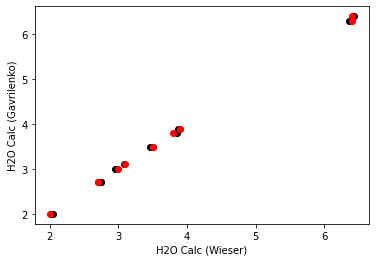

In [4]:
H2O_Calc_Thermobar=pt.calculate_ol_liq_hygr(liq_comps=myLiquids1, ol_comps=myOls1, equationH="H_Gavr2016")
H2O_Calc_Thermobar_round=np.round(H2O_Calc_Thermobar, 1)
plt.plot(H2O_Calc_Thermobar, my_input['H2O Inferred'], 'ok', label='not rounded')
plt.plot(H2O_Calc_Thermobar_round, my_input['H2O Inferred'], 'or', label='rounded')
plt.xlabel('H2O Calc (Wieser)')
plt.ylabel('H2O Calc (Gavrilenko)')

In [5]:
liq_comps_c=myLiquids1
ol_comps_c=myOls1
anhyd_cat_frac = pt.calculate_anhydrous_cat_fractions_liquid(liq_comps=liq_comps_c)
ol_cat_frac = pt.calculate_cat_fractions_olivine(ol_comps=ol_comps_c)
Liq_Ols = pd.concat([anhyd_cat_frac, ol_cat_frac], axis=1)
Liq_Ols['SiO2_Liq_mol_frac']

0     0.546187
1     0.520448
2     0.528772
3          NaN
4     0.535829
5     0.522482
6     0.529931
7          NaN
8     0.546809
9     0.543688
10    0.551872
11         NaN
12    0.561788
13    0.569770
14    0.569363
15         NaN
16    0.489775
17    0.499975
18    0.507921
19         NaN
20    0.539648
21    0.533066
22    0.538263
Name: SiO2_Liq_mol_frac, dtype: float64

(*, CaO_Liq, MgO_Liq, CaO_Ol)


Text(0, 0.5, 'H2O Calc (Wieser/Gavrilenko)')

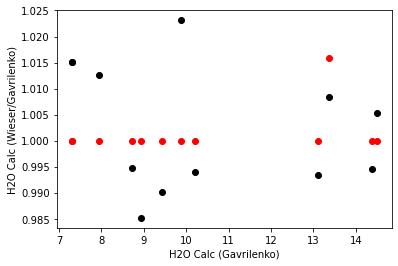

In [13]:
plt.plot(my_input['MgO_Liq'], H2O_Calc_Thermobar/my_input['H2O Inferred'], 'ok')
plt.plot(my_input['MgO_Liq'], H2O_Calc_Thermobar_round/my_input['H2O Inferred'], 'or')

plt.xlabel('H2O Calc (Gavrilenko)')
plt.ylabel('H2O Calc (Wieser/Gavrilenko)')

## Intermediate calculations for components used in calculation

In [14]:
CaO_Ol=myOls1['CaO_Ol']
CaO_Liq=myLiquids1['CaO_Liq']
MgO_Liq=myLiquids1['MgO_Liq']
DCa_dry_HighMgO=0.00042*MgO_Liq+0.0196
DCa_dry_LowMgO=-0.0043*MgO_Liq+0.072
DCa_dry_calc=np.empty(len(MgO_Liq), dtype=float)
DeltaCa=np.empty(len(MgO_Liq), dtype=float)

H2O_Calc=np.empty(len(MgO_Liq), dtype=float)

DCa_Meas=CaO_Ol/CaO_Liq
DCa_Divider=0.00462*MgO_Liq-0.027
for i in range(0, len(MgO_Liq)):
    if DCa_Meas[i]<=DCa_Divider[i]:
        DCa_dry_calc[i]=DCa_dry_HighMgO[i]
        DeltaCa[i]=DCa_dry_calc[i]-DCa_Meas[i]
        H2O_Calc[i]=397*DeltaCa[i]
    else:
        DCa_dry_calc[i]=DCa_dry_LowMgO[i]
        DeltaCa[i]=DCa_dry_calc[i]-DCa_Meas[i]    
        H2O_Calc[i]=188*DeltaCa[i]
H2O_Calc[CaO_Ol==0]=np.nan
    
H2O_Calc

array([       nan, 3.8790013 , 3.87453055,        nan,        nan,
       6.43349637, 6.35296403,        nan,        nan, 2.95550378,
       3.84773878,        nan,        nan, 2.74072029, 2.74072029,
              nan,        nan, 2.04624863, 3.08379921,        nan,
              nan, 3.47919886, 3.46546831])

Text(0, 0.5, 'DCa dry calc (Gavrilenko)')

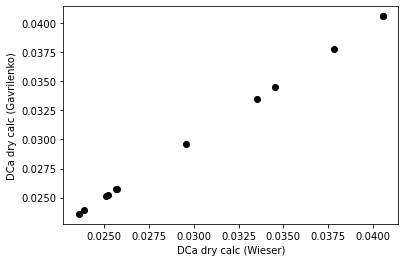

In [15]:
plt.plot(DCa_dry_calc, my_input['D CaO Ol/L Dry'], 'ok')
plt.xlabel('DCa dry calc (Wieser)')
plt.ylabel('DCa dry calc (Gavrilenko)')

Text(0, 0.5, 'DCa Meas (Gavrilenko)')

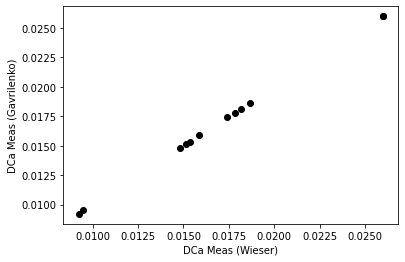

In [16]:
plt.plot(DCa_Meas, my_input['D CaO Ol/L Obs'], 'ok')
plt.xlabel('DCa Meas (Wieser)')
plt.ylabel('DCa Meas (Gavrilenko)')